<a href="https://colab.research.google.com/github/mrrajeev29/Linear-Regression-prediction/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
#Simple Prediction for given Y on a particular x

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data=pd.read_csv('/content/train.csv')

In [144]:
train=data.head(210)

In [145]:
train.size

420

In [146]:
x_train,y_train=train['x'],train['y']

In [208]:
x_train.mean()

45.34761904761905

In [209]:
y_train.mean()

45.109285170190475

In [211]:
train.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [212]:
train.tail(10)

,x,y
200,42.0,43.273609
201,62.0,66.482788
202,74.0,75.726055
203,77.0,80.596433
204,3.0,-2.235880
205,50.0,47.046550
206,24.0,21.596356
207,37.0,32.875590
208,58.0,57.957830
209,52.0,52.247600


In [213]:
train.info

<bound method DataFrame.info of         x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
205  50.0  47.046550
206  24.0  21.596356
207  37.0  32.875590
208  58.0  57.957830
209  52.0  52.247600

[210 rows x 2 columns]>

In [147]:
x_train

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
205    50.0
206    24.0
207    37.0
208    58.0
209    52.0
Name: x, Length: 210, dtype: float64

In [148]:
y_train

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
205    47.046550
206    21.596356
207    32.875590
208    57.957830
209    52.247600
Name: y, Length: 210, dtype: float64

In [149]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [150]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [16]:
train.size

1398

In [15]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [17]:
train.size

1398

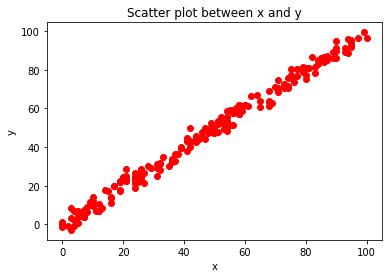

In [196]:
plt.scatter(train['x'],train['y'],color='red')
plt.title('Scatter plot between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [197]:
train.describe()

,x,y
count,210.000000,210.000000
mean,45.347619,45.109285
std,27.707082,27.787725
min,0.000000,-2.830750
25%,24.000000,22.632925
50%,46.000000,46.361088
75%,68.000000,65.876366
max,100.000000,99.403947


<Axes: xlabel='x', ylabel='y'>

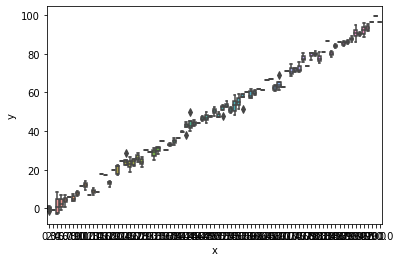

In [153]:
sns.boxplot(x=train['x'],y=train['y'])

<Axes: xlabel='x', ylabel='y'>

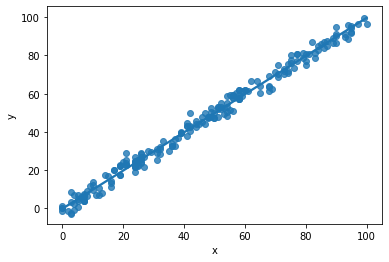

In [154]:
sns.regplot(x=train['x'],y=train['y'])

In [198]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    total_cost = 0
    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [156]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 1472.808


In [157]:
train['y'].fillna(train['y'].mean(),inplace=True)

<ipython-input-157-17da3d7bb942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'].fillna(train['y'].mean(),inplace=True)


In [158]:
initial_w=2
initial_b=1
cost=compute_cost(train['x'],train['y'],initial_w,initial_b)

In [159]:
train['x'].shape[0]

210

In [205]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [166]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -2807.9046244101614 -45.10928517019049


In [167]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -2234.7484339339712 -35.83976136066667


In [163]:
import copy
import math

In [203]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m =len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        if i<100000: 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b, J_history, w_history 

In [184]:
initial_w = 0.
initial_b = 0.
iterations = 1
alpha = 0.01

b,w,_,_ = gradient_descent(x_train,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 1034973.65   
w,b found by gradient descent: 0.4510928517019049 28.079046244101615


In [185]:
m = x_train.head(210).shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w * x_train.head(210)[i] + b

In [186]:
print(w,b)

0.4510928517019049 28.079046244101615


In [204]:
predict1=20*w+b
predict1

37.10090327813971

In [201]:
predict2=15*w+b
predict2

34.84543901963019

In [190]:
predict3=40*w+b
predict3

46.12276031217781

In [199]:
predict4=50*w+b
predict4

50.633688829196856

In [206]:
predict5=60*w+b
predict5

55.14461734621591